In [ ]:
import pandas as pd
from IPython.core.display import HTML
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.sample()

,id,url,landmark_id
944611,58748b652640e771,https://lh5.googleusercontent.com/-hdq84YhEkx0...,165


In [4]:
train.iloc[4].url

'https://lh5.googleusercontent.com/-tnmSXwQcWL8/SfhIj_3pugI/AAAAAAAAAdg/X55Wx8dGz-Q/s1600/'

In [5]:
train.sample().iloc[0]['url']

'http://lh5.ggpht.com/-4ZJrUvHBvNY/SX48SMt61BI/AAAAAAAACz0/fPzURAGrFxs/s1600/'

# Instance 5 (loaded via URL)

## ID 10400

### https://lh5.googleusercontent.com/-mEaSECO7D-4/SwmpqVy2zDI/AAAAAAAAm-0/X_HxNBVc9zQ/rj/

![Instance5](https://lh5.googleusercontent.com/-mEaSECO7D-4/SwmpqVy2zDI/AAAAAAAAm-0/X_HxNBVc9zQ/rj/)

In [29]:
# see how many training instances we have for some "random" ids

[train[train['landmark_id'] == landmark_id].shape[0]  for landmark_id in
 [1,2,3,4,6651,10,20,40,100,400,800,9000,11000,12000,13000,14000,10400]]

[3, 6, 202, 8, 9508, 5, 6, 25, 66, 64, 16, 5, 50, 19, 2, 83, 325]

In [22]:
# find records by id and render with html

def images(id, num=5):
    urls = [url for url in train[train['landmark_id'] == id][0:num].url]
    imageTags = ["""<img src="{0}" />""".format(url) for url in urls]
    return HTML(' '.join(imageTags))

In [28]:
train[train['landmark_id'] == 2].shape[0]

(6, 3)

In [30]:
images(202, num=10)

In [8]:
counts = train.groupby(['landmark_id']).count().id

In [9]:
counts[(counts > 10000)]

landmark_id
2061    13271
5554    11147
6051    50148
6599    23415
9633    50337
9779    18471
Name: id, dtype: int64

In [10]:
counts[(counts > 10000)].size

6

In [11]:
counts[counts > 1000].size

117

In [17]:
counts[(counts > 100) & (counts < 1000)].size

1900

In [15]:
counts[(counts > 10) & (counts < 100)].size

6356

In [57]:
counts[(counts < 10)].size

6165

In [36]:
def load_image(id):
    return load_img("/data/train/{0}.jpg".format(train[train['id'] == id].iloc[0].id))

In [34]:
train[train['id'] == '58748b652640e771']

'58748b652640e771'

In [39]:
x = load_image('58748b652640e771')

In [43]:
img_to_array(x).shape

(512, 384, 3)

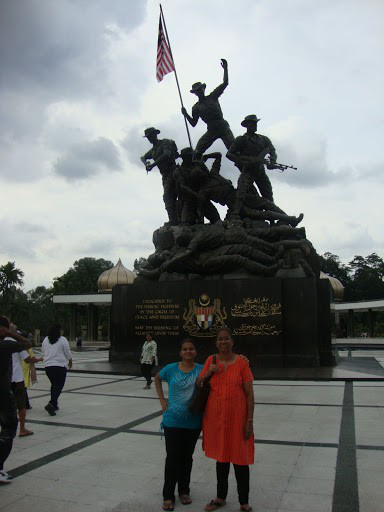

In [44]:
x

In [54]:
i = 0

for index, row in train.iterrows():
    i = i + 1
    if i > 10: break
    print(row.landmark_id)
    os.rename('/data/train/{0}.jpg'.format(row.id), 
        '/data/train/{0}/{1}.jpg'.format(row.landmark_id, row.id))

4676


FileNotFoundError: [Errno 2] No such file or directory: '/data/train/cacf8152e2d2ae60.jpg' -> '/data/train/4676/cacf8152e2d2ae60.jpg'

In [ ]:
data.iloc[0]